# Introduction To Data Science – Assignment 1

---

### Sections A – B – C – D

---

***Instructions***

Due Date: Sunday 18th September 2022 – 11:59PM

Name the file in the format Lyyxxxx and save it as .ipynb (e.g. L201234.ipynb)

Submission will be taken on **GitHub and Google Classroom (submit the .ipynb file)** - Instructions to upload onto GitHub are provided in the link https://docs.google.com/document/d/1BR1ULOGeGWJVU6Rr6Qty1FR-quVRZyRvQGII6nEs-wo/edit?usp=sharing

After uploading and submitting the .ipynb file onto Google Classroom, also private comment the link to the GitHub repository.

All source files needed to complete this assignment can be found on the following Google Drive link https://drive.google.com/drive/folders/1VrkaVcExGWqilSeh50WZe4gUBjmUiJ9b?usp=sharing

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

Happy Coding 😊

---

---
## Question 1
---

Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [46]:
# define procedure here
def check_input(list1):
  flag=True
  length=len(list1)
  for list2 in list1:
    count=0
    for value in list2:
      count = list2.count(value)
      if type(value)!= int:
        return False
      if count >1 or value > length:
        flag= False
        break
      else:
        flag= True

    if flag == False:
      break
        
  if flag==False:
    return False
  else:
    return True


In [48]:
# run this block to test code after defining the procedure

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]


print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false

True
False
False


---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("/StudentMarkSheet.csv")
print(data)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [5]:
lenbefore = len(data)
print ("Number of Rows befor ",lenbefore)
count=data.isna().any(axis=1).sum()
print ("Number of missing data Rows ",count)
print("Number of rows after ", lenbefore-count)
data2=data.dropna()

Number of Rows befor  200
Number of missing data Rows  4
Number of rows after  196


**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [9]:
print(data[data['Student name']=='James Walker'])

     Student name    Exam name   Exam date  Marks
0    James Walker      Biology  05/06/2016   31.0
42   James Walker    Chemistry  15/06/2016   61.0
71   James Walker  Mathematics  29/07/2016   23.0
150  James Walker      Physics  10/06/2016  100.0
180  James Walker    Sociology  21/06/2016   73.0


---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [ ]:
sublist=("Biology","Chemistry","Philosophy","Mathematics","Physics","Sociology")
avglist=[]
for sub in sublist:
  temp=0
  slen=0
  sum=0
  avg=0
  temp = data2[data2['Exam name']==sub]
  temp = temp['Marks']
  slen= len(temp)
  sum = temp.sum()
  avg = sum/slen
  avglist.append(avg)
  print("Average Marks of ",sub ," is ",avg)

**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

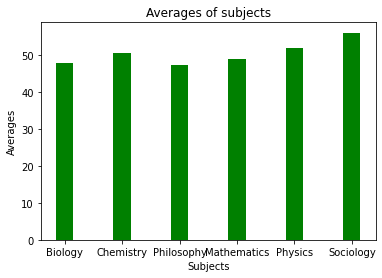

In [37]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize =(6, 7))
#plt.bar(sublist,avglist)
plt.bar(sublist, avglist, color ='green',width=0.3)
plt.xlabel("Subjects")
plt.ylabel("Averages")
plt.title("Averages of subjects")
plt.show()

---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

catdata=pd.read_csv("/CatData.csv")
cdata= catdata.dropna()

**Part B** - Identify the independant and dependant variables (comment answer below)

In [ ]:
# dependant variable: mass

# independant variable: Tail length

**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


In [15]:
x = cdata.iloc[:, :-1].values
y = cdata.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

**Part D** - Print the values for slope and y-intercept

In [16]:
slope = model.coef_
intercept = model.intercept_

print("Slope is ", slope)
print("Intercept is ", intercept)

Slope is  [0.49461644]
Intercept is  -5.737302964662192


**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

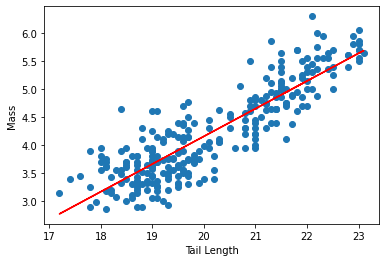

In [19]:
plt.scatter(x_train,y_train)
plt.plot(x_train,slope[0]*x_train+intercept,color="red")
plt.xlabel("Tail Length")
plt.ylabel("Mass")
plt.show()